In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm

In [2]:
#THIS FILE IS NOT INCLUDED IN THE GITHUB REPOSITYORY! Because of its filesize of 850MB (too large for GitHub).
#BEFORE RUNNING THIS CODE, UNPACK THE FULL_DF.ZIP FILE! DO NOT COMMIT THE FILE TO THE REPO!
df = pd.read_csv("output/full_df.csv").drop(columns="Unnamed: 0")

In [3]:
#Does the data load as intended?
df.head(5)

[run number]  size-of-std  transform-houses?  avg_migrant_income  \
0            16        0.125              False               19000   
1            16        0.125              False               19000   
2            16        0.125              False               19000   
3            16        0.125              False               19000   
4            16        0.125              False               19000   

   improve-health?  increase-social-housing?  build-more-houses?  \
0            False                     False               False   
1            False                     False               False   
2            False                     False               False   
3            False                     False               False   
4            False                     False               False   

   random-attributes?  housing-market-inflation?  migrant-multiplier  ...  \
0               False                      False                 1.0  ...   
1               False                      False                 1.0  ...   
2               False                      False                 1.0  ...   
3               False                      False                 1.0  ...   
4               False                      False                 1.0  ...   

   KPI-p-sc-upper  KPI-p-dutch  KPI-p-other-western  KPI-p-antilles  \
0           0.123        0.549                0.147           0.016   
1           0.283        0.698                0.082           0.012   
2           0.001        0.277                0.131           0.057   
3           0.000        0.249                0.043           0.034   
4           0.000        0.000                0.000           0.000   

   KPI-p-morocco  KPI-p-suriname  KPI-p-turkey  KPI-p-indonesian  \
0          0.022           0.034         0.065             0.018   
1          0.011           0.041         0.045             0.022   
2          0.035           0.028         0.084             0.016   
3          0.147           0.022         0.105             0.194   
4          0.000           0.000         0.000             0.000   

   KPI-p-eastern-eu  KPI-p-other-nonwestern  
0             0.059                   0.090  
1             0.026                   0.063  
2             0.032                   0.340  
3             0.063                   0.143  
4             0.000                   0.000  

[5 rows x 34 columns]

In [4]:
df.columns

Index(['[run number]', 'size-of-std', 'transform-houses?',
       'avg_migrant_income', 'improve-health?', 'increase-social-housing?',
       'build-more-houses?', 'random-attributes?', 'housing-market-inflation?',
       'migrant-multiplier', 'mixed-use-zoning?', 'improve-safety?', '[step]',
       'Neighborhood number', 'KPI-available_buy_houses',
       'KPI-available_part_rent_houses', 'KPI-available_social_rent_houses',
       'KPI-avg_income', 'KPI-avg_price', 'KPI-avg_utility',
       'KPI-citizen-count', 'KPI-p-sc-lower', 'KPI-p-sc-working',
       'KPI-p-sc-middle', 'KPI-p-sc-upper', 'KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern'],
      dtype='object')

In [5]:
df.shape

(4815360, 34)

In [6]:
#this is for the report~
#print(df.describe().round(2).T.drop(columns="count").to_latex(longtable=True))

In [7]:
df.groupby("Neighborhood number")[df.columns[14:]].describe().round(2)

KPI-available_buy_houses                             \
                                       count      mean     std      min   
Neighborhood number                                                       
1                                    42240.0   1449.35  275.49    536.0   
2                                    42240.0   1878.73  843.40      0.0   
3                                    42240.0  12509.97  635.14  11495.0   
4                                    42240.0   2519.07  335.98   2123.0   
5                                    42240.0    260.31   42.79    211.0   
...                                      ...       ...     ...      ...   
117                                  42240.0      0.02    0.16      0.0   
118                                  42240.0   1072.08  327.20    471.0   
119                                  42240.0    761.87  255.54    314.0   
120                                  42240.0   2599.78  810.29    216.0   
121                                  42240.0    350.02  161.47     60.0   

                                                         \
                         25%      50%      75%      max   
Neighborhood number                                       
1                     1284.0   1419.0   1516.0   2593.0   
2                     1333.0   1797.0   2410.0   4441.0   
3                    12047.0  12492.0  12856.0  14875.0   
4                     2335.0   2470.0   2563.0   3919.0   
5                      241.0    249.0    257.0    460.0   
...                      ...      ...      ...      ...   
117                      0.0      0.0      0.0      4.0   
118                    841.0   1085.0   1264.0   2159.0   
119                    591.0    766.0    883.0   1674.0   
120                   2015.0   2599.0   3034.0   5096.0   
121                    238.0    353.0    435.0    929.0   

                    KPI-available_part_rent_houses           ...  \
                                             count     mean  ...   
Neighborhood number                                          ...   
1                                          42240.0   652.44  ...   
2                                          42240.0   221.85  ...   
3                                          42240.0  5778.32  ...   
4                                          42240.0  1488.99  ...   
5                                          42240.0    89.95  ...   
...                                            ...      ...  ...   
117                                        42240.0     0.01  ...   
118                                        42240.0    68.54  ...   
119                                        42240.0   268.12  ...   
120                                        42240.0    20.50  ...   
121                                        42240.0     5.60  ...   

                    KPI-p-eastern-eu       KPI-p-other-nonwestern              \
                                 75%   max                  count  mean   std   
Neighborhood number                                                             
1                               0.04  0.16                42240.0  0.05  0.01   
2                               0.05  0.22                42240.0  0.08  0.04   
3                               0.04  0.06                42240.0  0.09  0.01   
4                               0.04  0.07                42240.0  0.08  0.01   
5                               0.02  0.07                42240.0  0.09  0.02   
...                              ...   ...                    ...   ...   ...   
117                             0.00  0.29                42240.0  0.05  0.08   
118                             0.02  0.06                42240.0  0.12  0.01   
119                             0.02  0.04                42240.0  0.12  0.01   
120                             0.03  0.04                42240.0  0.09  0.01   
121                             0.03  0.07                42240.0  0.11  0.02   

                                                   
  

Text(0.5, 1, 'Correlation Matrix')

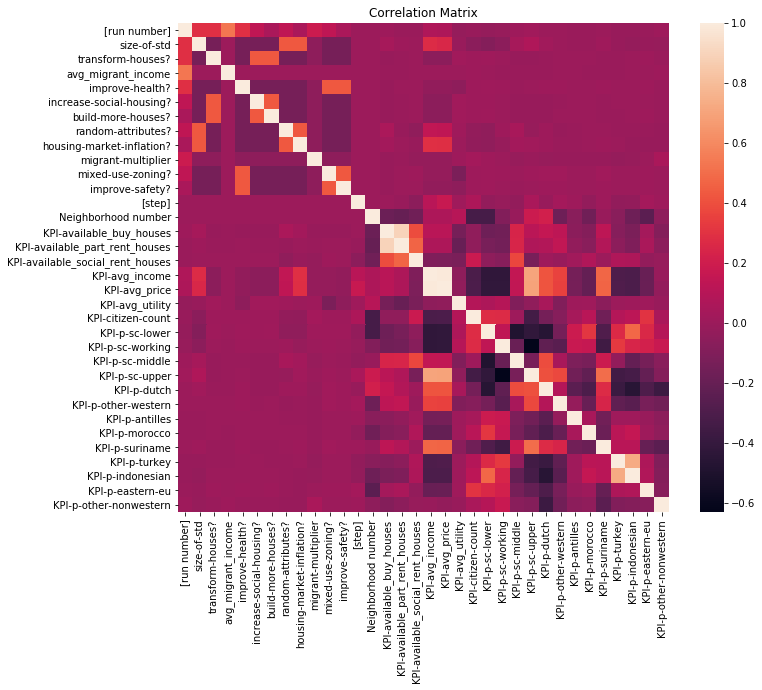

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr())
plt.title("Correlation Matrix")
#plt.savefig('output/images/corr_full.png')

In [9]:
p1 = df[df["size-of-std"]==0.5].assign(x="p1")
p2 = df[df["migrant-multiplier"]==0.5].assign(x="p2")
p3 = df[df["migrant-multiplier"]==2].assign(x="p3")
p4 = df[df["avg_migrant_income"]==16000].assign(x="p4")
p5 = df[df["avg_migrant_income"]==22000].assign(x="p5")

l1 = df[df["transform-houses?"]==True].assign(x="l1")
l2 = df[df["improve-health?"]==True].assign(x="l2")
l3 = df[df["increase-social-housing?"]==True].assign(x="l3")
l4 = df[df["build-more-houses?"]==True].assign(x="l4")
l5 = df[df["random-attributes?"]==True].assign(x="l5")
l6 = df[df["housing-market-inflation?"]==True].assign(x="l6")
l7 = df[df["mixed-use-zoning?"]==True].assign(x="l7")
l8 = df[df["improve-safety?"]==True].assign(x="l8")

In [10]:
all_dfs = pd.concat([p1,p2,p3,p4,p5,l1,l2,l3,l4,l5,l6,l7,l8])

In [11]:
all_dfs_melt = pd.melt(all_dfs, id_vars=["x"], var_name=["KPI"])

In [27]:
all_dfs_melt["value"] = all_dfs_melt["value"].astype(float)

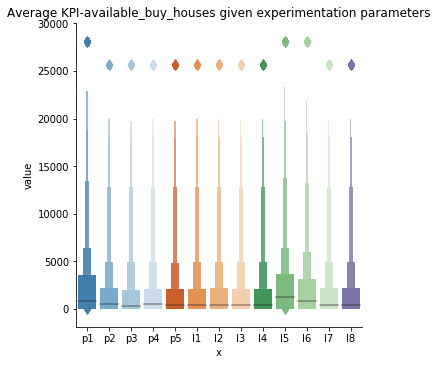

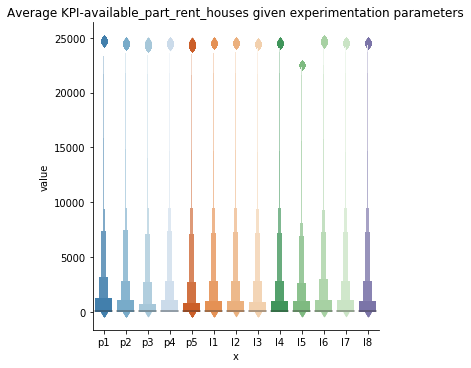

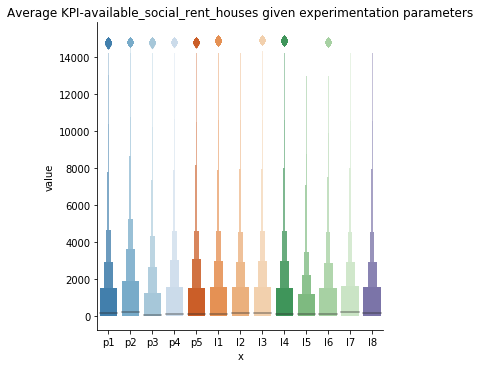

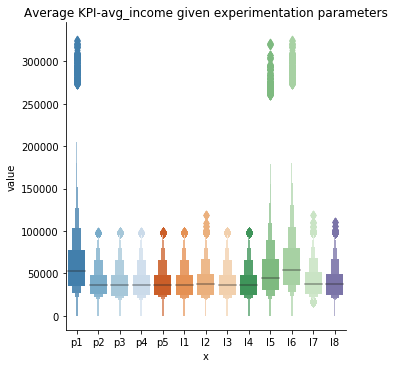

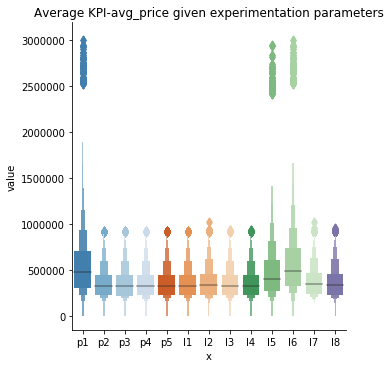

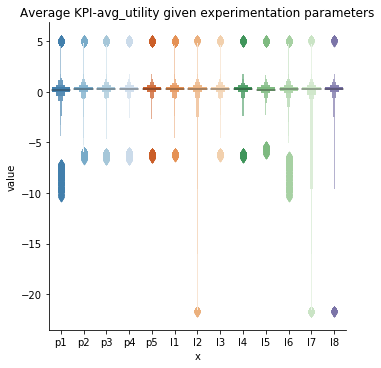

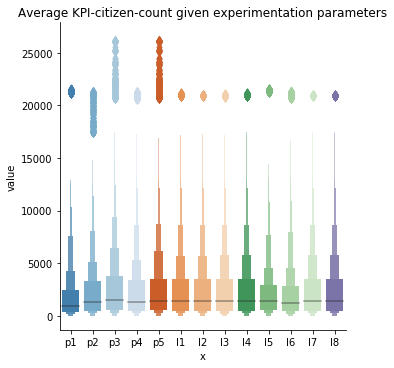

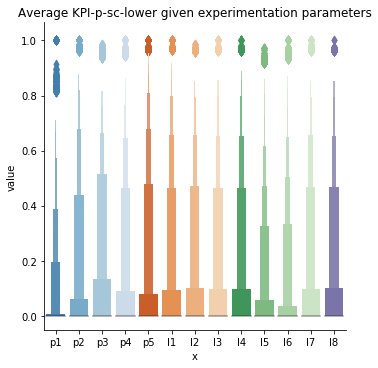

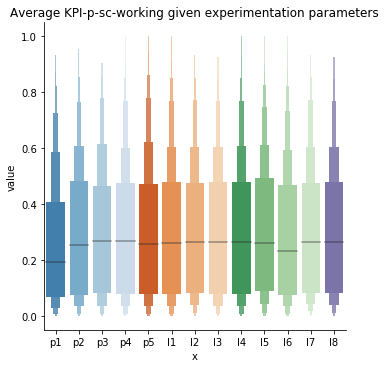

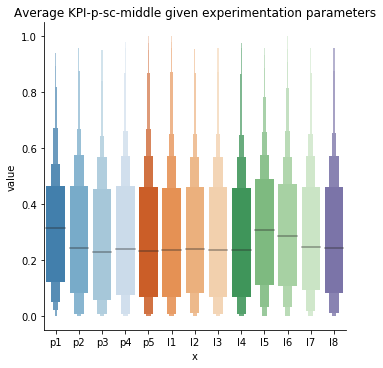

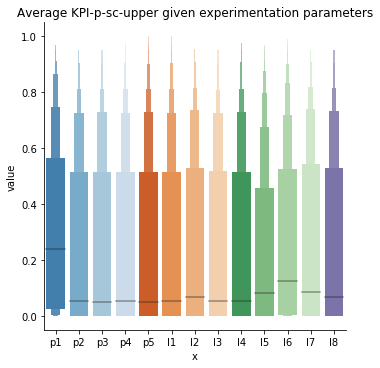

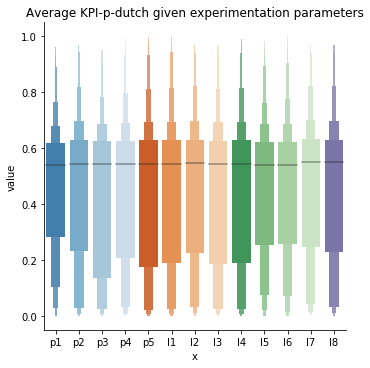

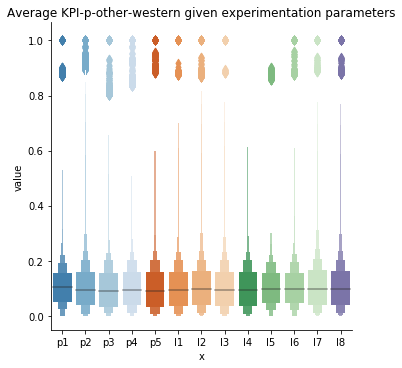

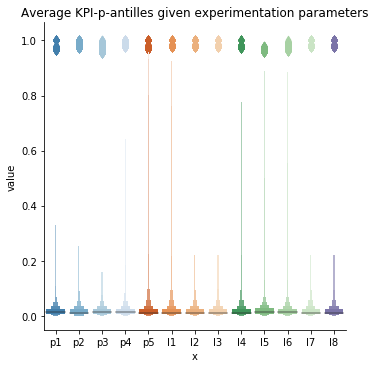

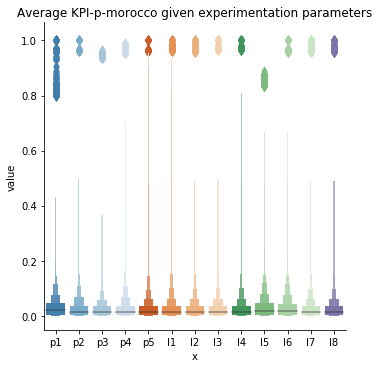

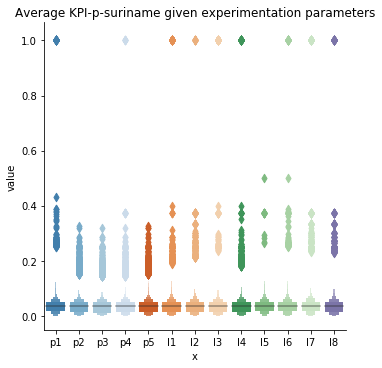

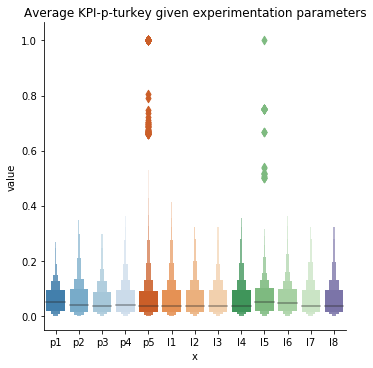

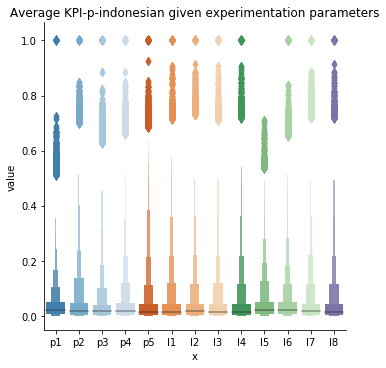

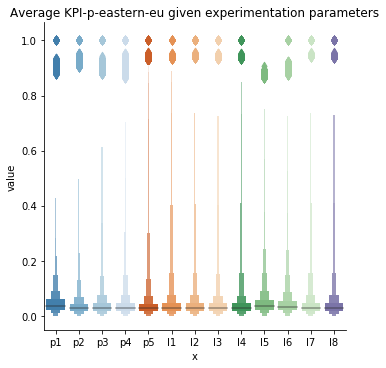

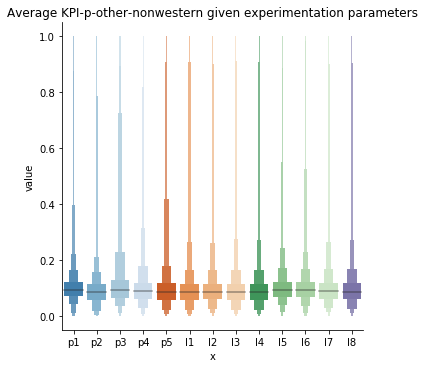

In [29]:
for KPI in df.columns[14:]:
    plt.Figure()
    sns.catplot(x="x",y="value",palette="tab20c",data=all_dfs_melt[all_dfs_melt["KPI"]==KPI],kind="boxen")
    plt.title("Average "+KPI+" given experimentation parameters")
    plt.savefig('output/images/avg_'+KPI+'_policies.png')
    plt.show()

In [14]:
corr_list = []
for policy_df in [p1,p2,p3,p4,p5,l1,l2,l3,l4,l5,l6,l7,l8]:
    temp = df.mean()[df.columns[14:]].corr(policy_df.mean()[policy_df.columns[14:]],method="spearman")
    corr_list.append(temp)

In [15]:
columns = ['Neighborhood number','KPI-p-sc-lower', 'KPI-p-sc-working', 'KPI-p-sc-middle',
       'KPI-p-sc-upper', 'KPI-p-dutch', 'KPI-p-other-western',
       'KPI-p-antilles', 'KPI-p-morocco', 'KPI-p-suriname', 'KPI-p-turkey',
       'KPI-p-indonesian', 'KPI-p-eastern-eu', 'KPI-p-other-nonwestern']

In [16]:
#I really like how python doesn't store variables locally, so attempting to call the variable name string is impossible.
melted_nh = pd.melt(df[df["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_nh.name = "Total"
melted_p1_nh = pd.melt(p1[p1["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p1_nh.name = "P1"
melted_p2_nh = pd.melt(p2[p2["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p2_nh.name = "P2"
melted_p3_nh = pd.melt(p3[p3["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p3_nh.name = "P3"
melted_p4_nh = pd.melt(p4[p4["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p4_nh.name = "P4"
melted_p5_nh = pd.melt(p5[p5["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p5_nh.name = "P5"
melted_l1_nh = pd.melt(l1[l1["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l1_nh.name = "L1"
melted_l2_nh = pd.melt(l2[l2["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l2_nh.name = "L2"
melted_l3_nh = pd.melt(l3[l3["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l3_nh.name = "L3"
melted_l4_nh = pd.melt(l4[l4["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l4_nh.name = "L4"
melted_l5_nh = pd.melt(l5[l5["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l5_nh.name = "L5"
melted_l6_nh = pd.melt(l6[l6["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l6_nh.name = "L6"
melted_l7_nh = pd.melt(l7[l7["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l7_nh.name = "L7"
melted_l8_nh = pd.melt(l8[l8["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l8_nh.name = "L8"

<Figure size 432x288 with 0 Axes>

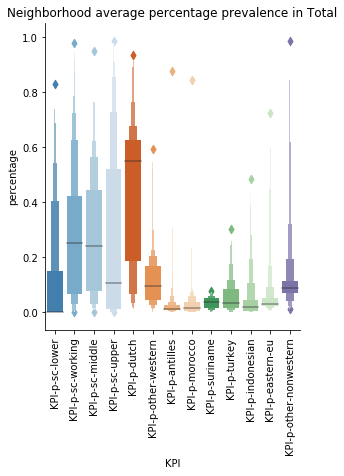

<Figure size 432x288 with 0 Axes>

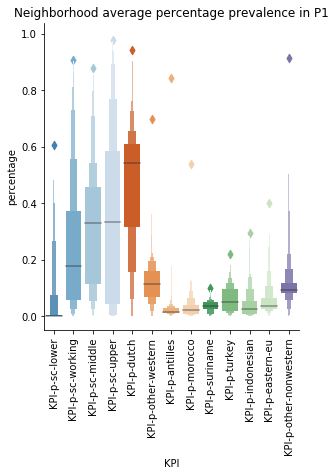

<Figure size 432x288 with 0 Axes>

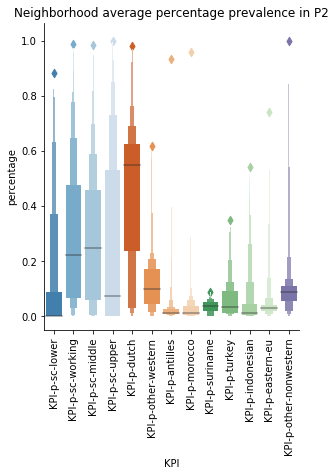

<Figure size 432x288 with 0 Axes>

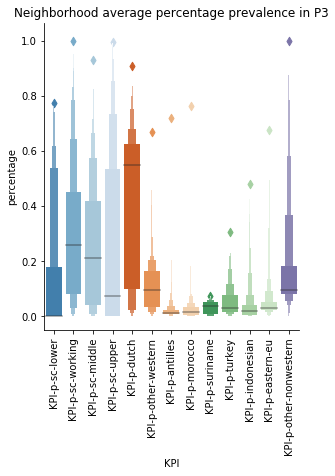

<Figure size 432x288 with 0 Axes>

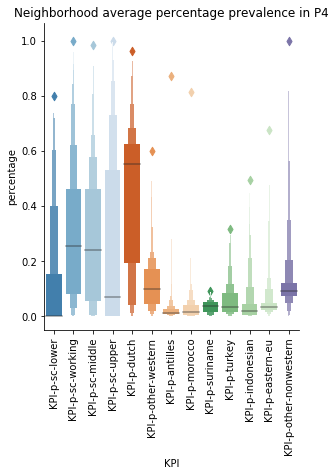

<Figure size 432x288 with 0 Axes>

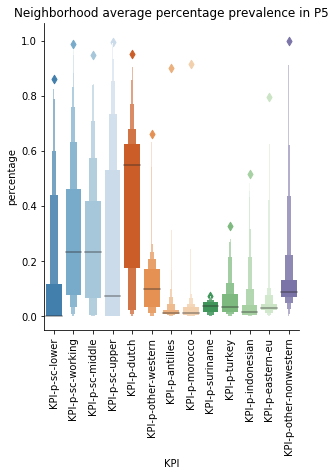

<Figure size 432x288 with 0 Axes>

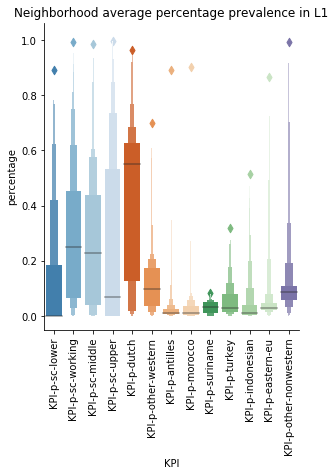

<Figure size 432x288 with 0 Axes>

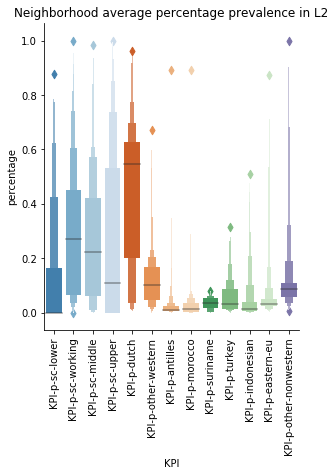

<Figure size 432x288 with 0 Axes>

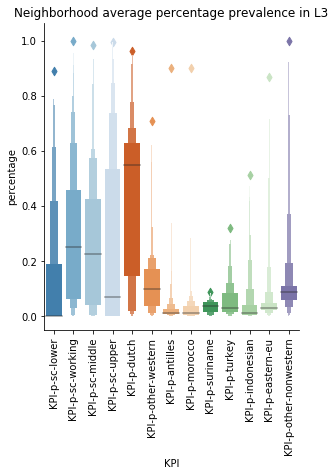

<Figure size 432x288 with 0 Axes>

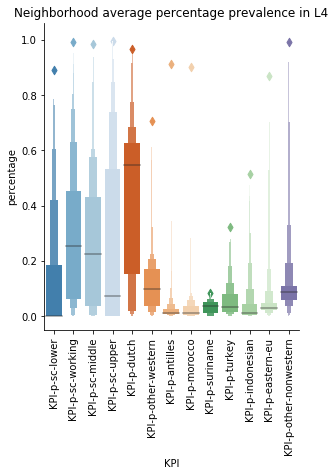

<Figure size 432x288 with 0 Axes>

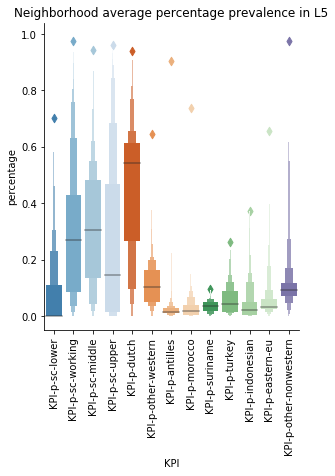

<Figure size 432x288 with 0 Axes>

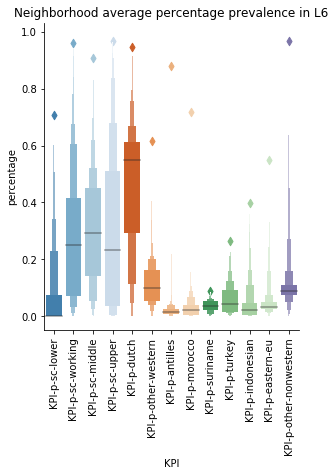

<Figure size 432x288 with 0 Axes>

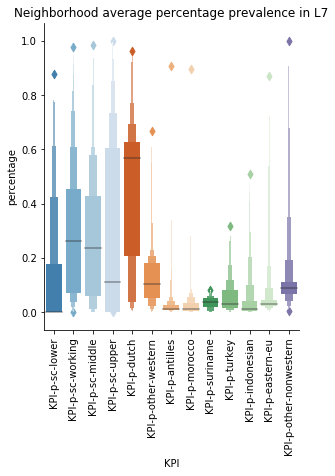

<Figure size 432x288 with 0 Axes>

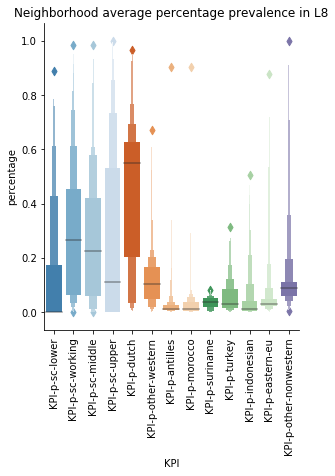

In [21]:
for melts_nh in [melted_nh,melted_p1_nh,melted_p2_nh,melted_p3_nh,melted_p4_nh,melted_p5_nh,melted_l1_nh,melted_l2_nh,melted_l3_nh,melted_l4_nh,melted_l5_nh,melted_l6_nh,melted_l7_nh,melted_l8_nh]:    
    plt.figure()
    sns.catplot(x="KPI",y="percentage",data=melts_nh,kind="boxen",palette="tab20c")
    plt.title("Neighborhood average percentage prevalence in " + melts_nh.name)
    plt.xticks(rotation=90)
    plt.savefig('output/images/avg_KPI_'+melts_nh.name+'.png')
    plt.show()

In [18]:
#Average homelessness with each policy lever
i = 1
l = []
for policy in [df,p1,p2,p3,p4,p5,l1,l2,l3,l4,l5,l6,l7,l8,df]:
    if i == 4: calc = 472600 - sum(policy[policy["[step]"]==40].groupby("Neighborhood number").mean()["KPI-citizen-count"])
    elif i == 3: calc = 304000 - sum(policy[policy["[step]"]==40].groupby("Neighborhood number").mean()["KPI-citizen-count"]) 
    else: calc = 360300 - sum(policy[policy["[step]"]==40].groupby("Neighborhood number").mean()["KPI-citizen-count"])
    print("P" + str(i) + " has an average of " + str(round(calc)) + " homeless people.")
    l.append(calc)
    i = i + 1

P1 has an average of 31677 homeless people.
P2 has an average of 120431 homeless people.
P3 has an average of 3203 homeless people.
P4 has an average of 93963 homeless people.
P5 has an average of 36490 homeless people.
P6 has an average of 7246 homeless people.
P7 has an average of 14292 homeless people.
P8 has an average of 14563 homeless people.
P9 has an average of 14339 homeless people.
P10 has an average of 14255 homeless people.
P11 has an average of 77138 homeless people.
P12 has an average of 95348 homeless people.
P13 has an average of 14489 homeless people.
P14 has an average of 14407 homeless people.
P15 has an average of 31677 homeless people.


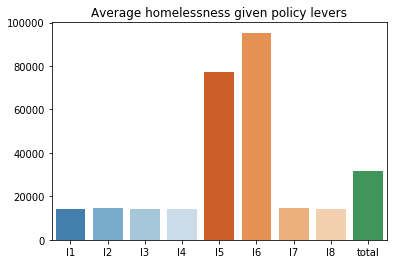

In [30]:
ticks = ["l1",'l2',"l3",'l4','l5','l6','l7','l8','total']
sns.barplot(x=ticks,y=l[6:],palette="tab20c")
plt.title("Average homelessness given policy levers")
plt.savefig('output/images/avg_homeless_l.png')

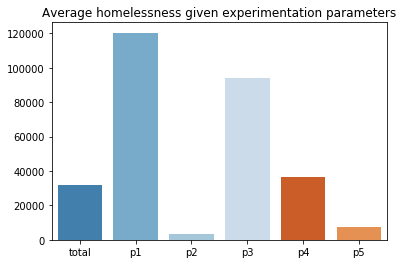

In [31]:
ticks = ["total","p1","p2","p3","p4",'p5']
sns.barplot(x=ticks,y=l[:6],palette="tab20c")
plt.title("Average homelessness given experimentation parameters")
plt.savefig('output/images/avg_homeless_p.png')

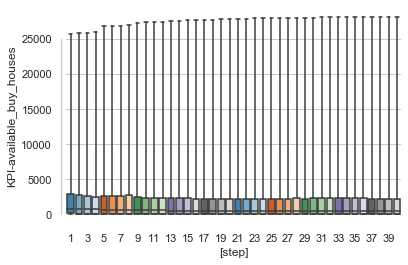

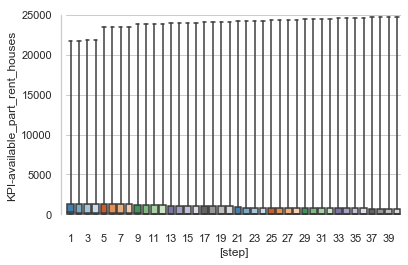

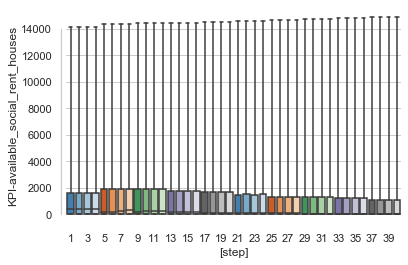

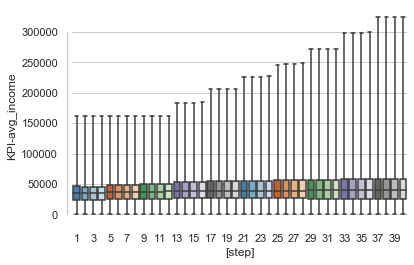

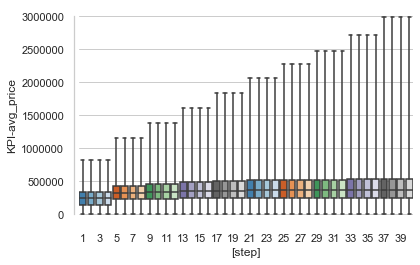

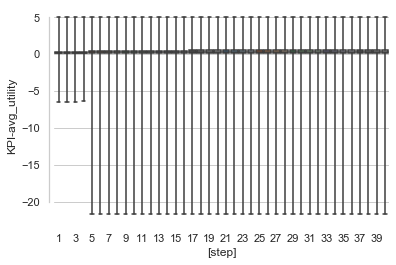

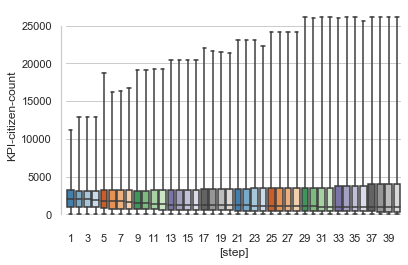

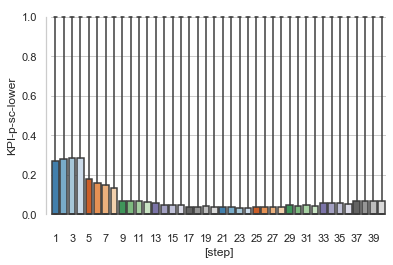

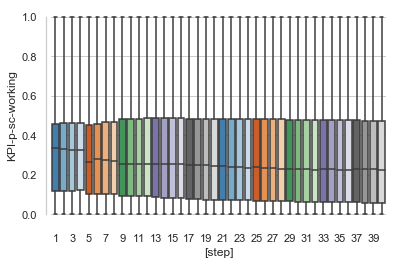

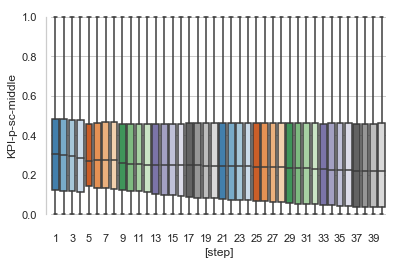

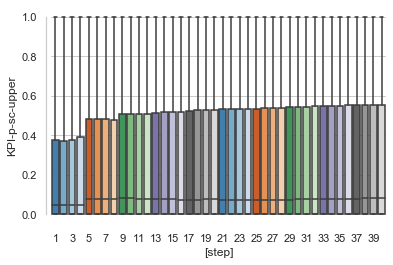

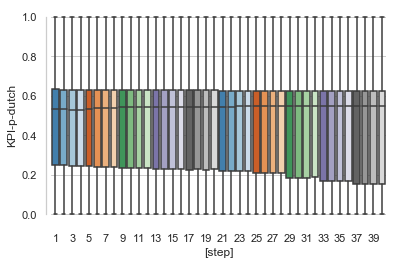

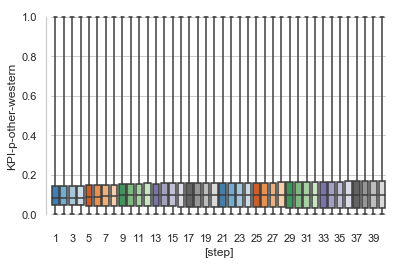

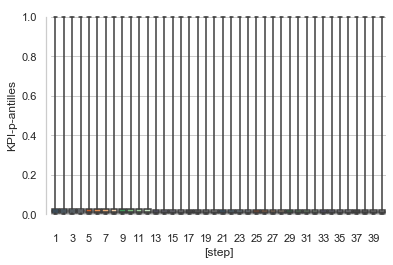

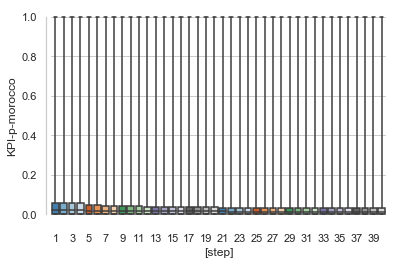

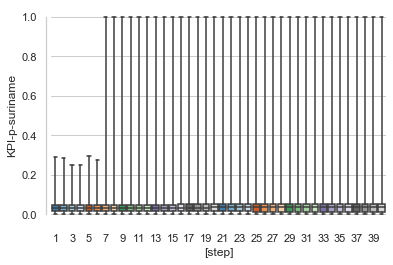

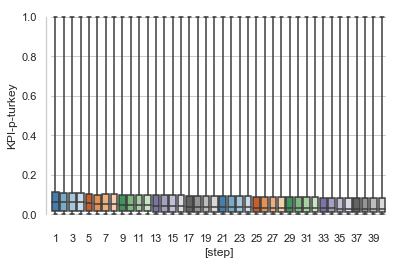

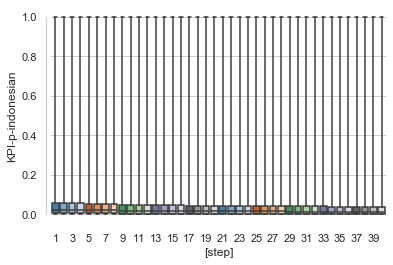

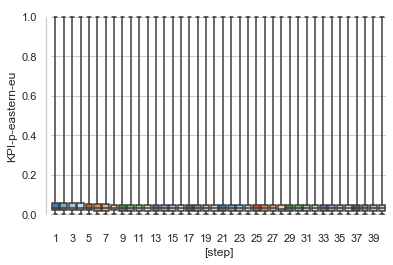

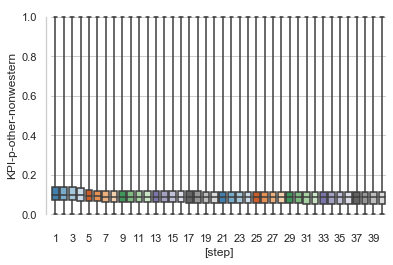

In [99]:
for c in df.columns[14:]:
    plt.Figure(figsize=[40,10])
    sns.set(style="whitegrid")
    sns.boxplot(x="[step]", y = c,data=df,whis=[0,100],palette="tab20c")
    sns.despine(offset=5,bottom=True, trim=True)
    locs, labels = plt.xticks()
    plt.xticks(locs[0::2],labels[0::2])
    plt.savefig("output/images/timechange_"+c+".png")
    plt.show()

In [121]:
buurten = gpd.read_file("output/buurten.shp")
#add KPIs to the shp df
#buurten = buurten.merge(df,left_on="BUURTCODE",right_on="Neighborhood number")

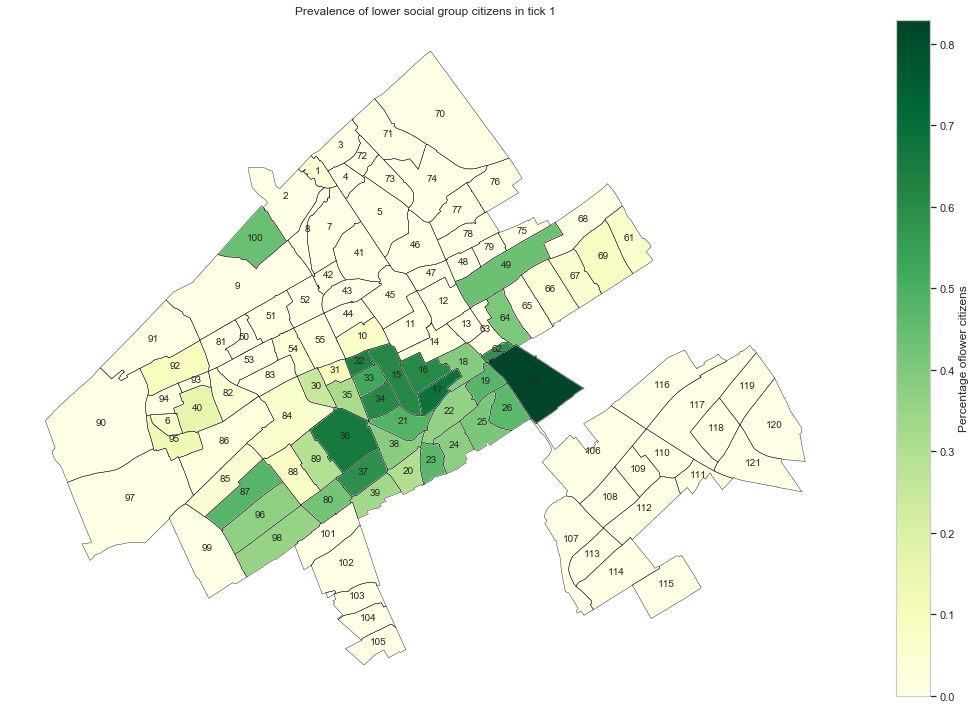

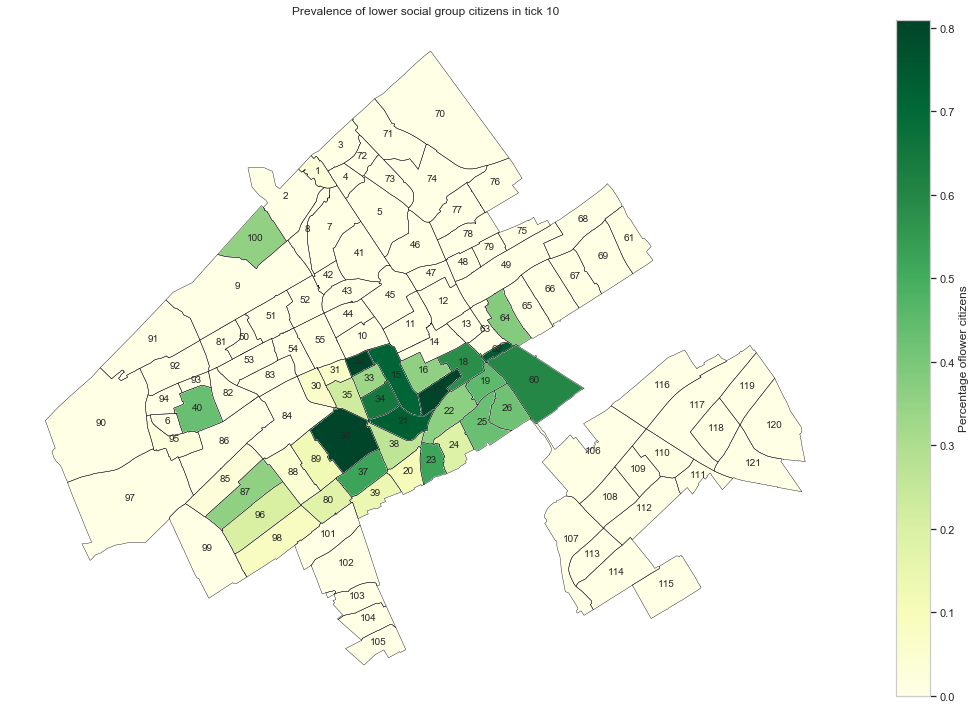

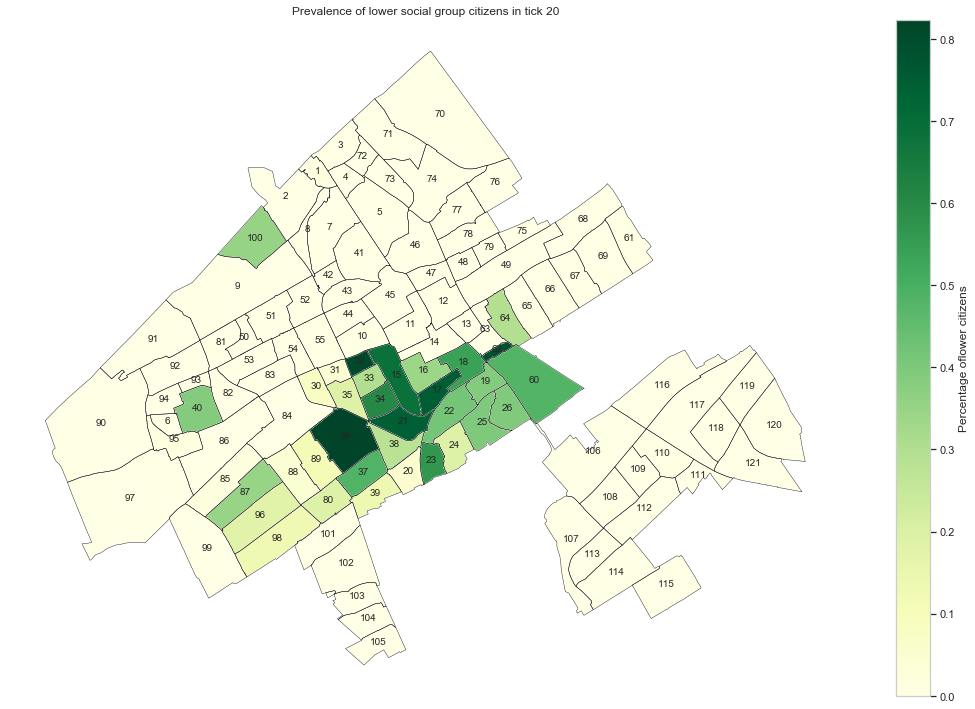

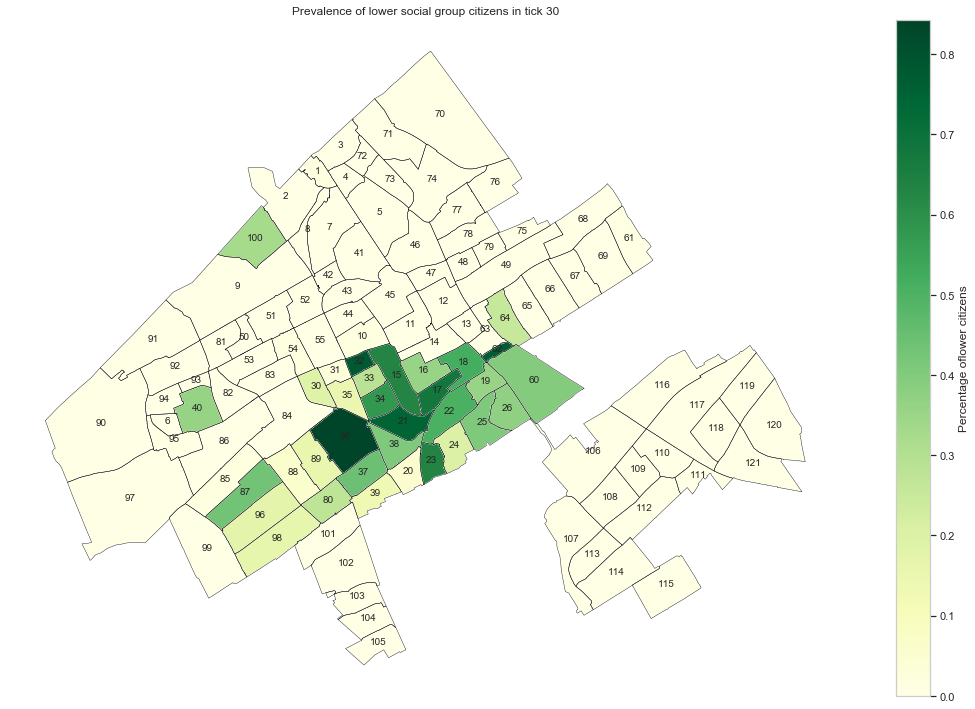

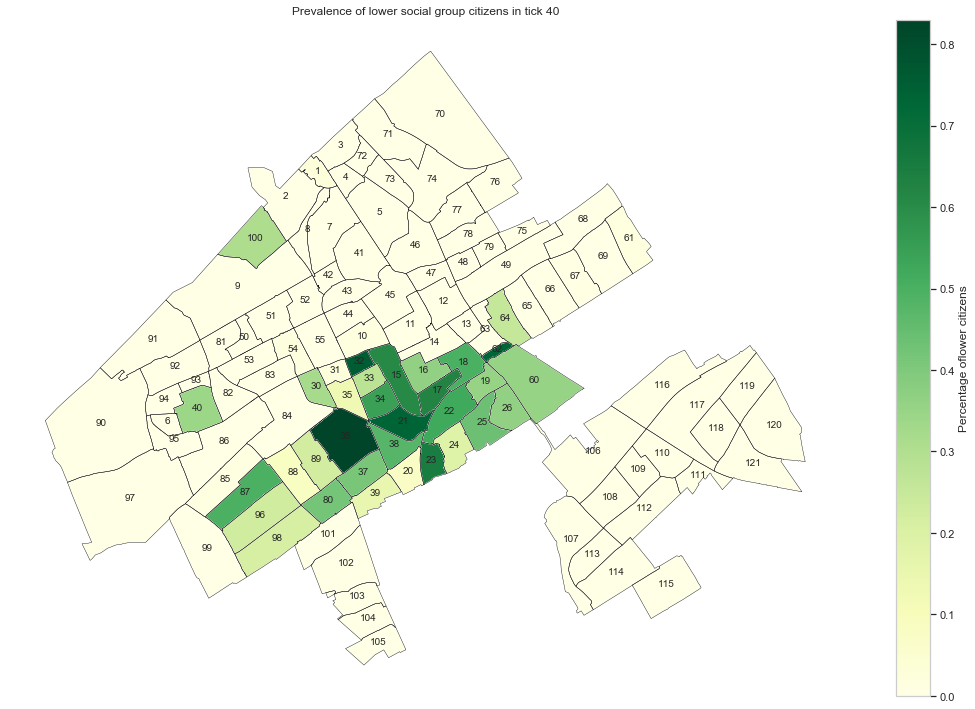

In [129]:
for tick in [1,10,20,30,40]:
    plt.Figure()
    b_tick = df[df["[step]"]==tick].groupby("Neighborhood number").mean()
    b_tick = buurten.merge(b_tick,left_on="BUURTCODE",right_on="Neighborhood number")
    fig = plt.figure(1, figsize=(15,10)) 
    ax = fig.add_subplot()
    string = "lower"
    b_tick.apply(lambda x: ax.annotate(s=x.BUURTCODE, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);

    b_tick.boundary.plot(ax=ax, color='Black', linewidth=.4)

    b_tick.plot(ax=ax, cmap='YlGn', column='KPI-p-sc-lower', figsize=(12, 12),legend=True,
                 legend_kwds={'label': "Percentage of" + string + " citizens"}).axis('off')
    plt.title("Prevalence of " + string + " social group citizens in tick " + str(tick))
    fig.tight_layout()
    plt.savefig("output/images/map_"+string+"_"+str(tick)+".png")
    plt.show()

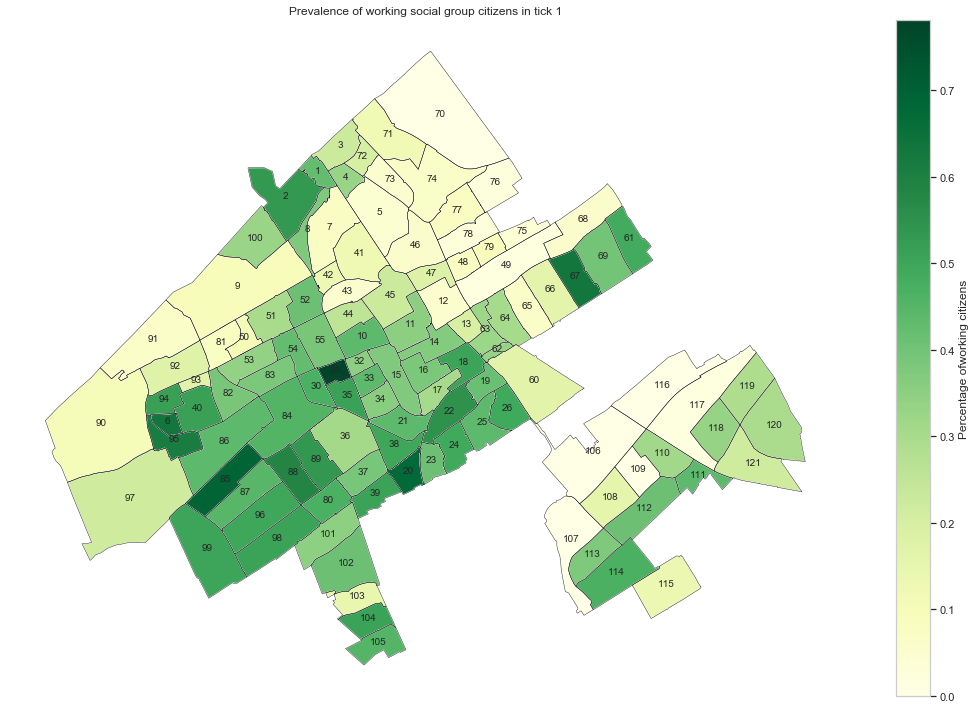

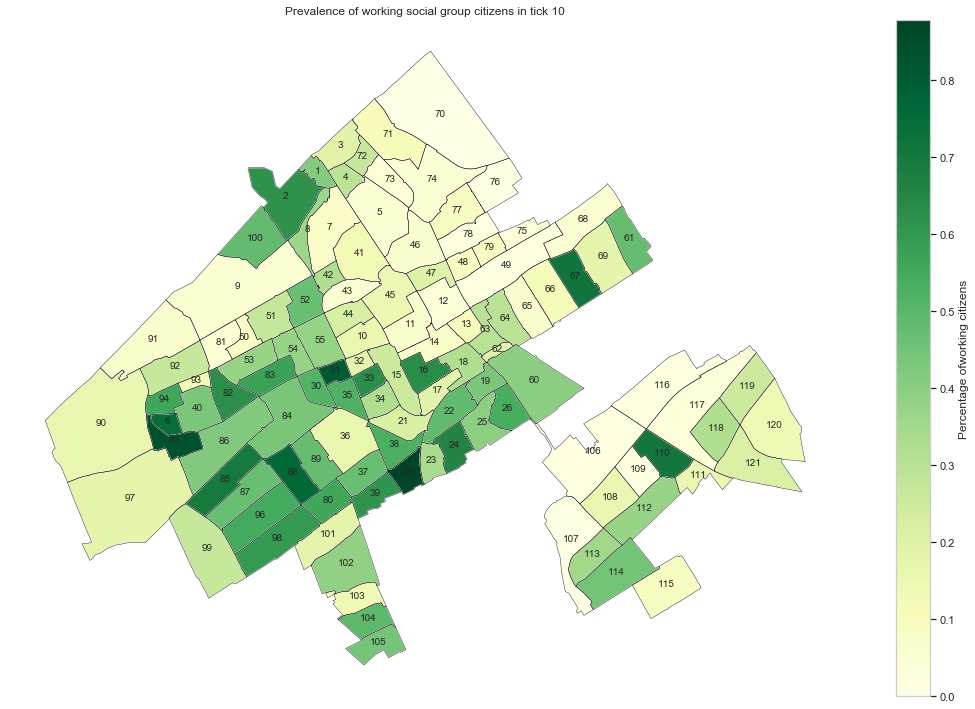

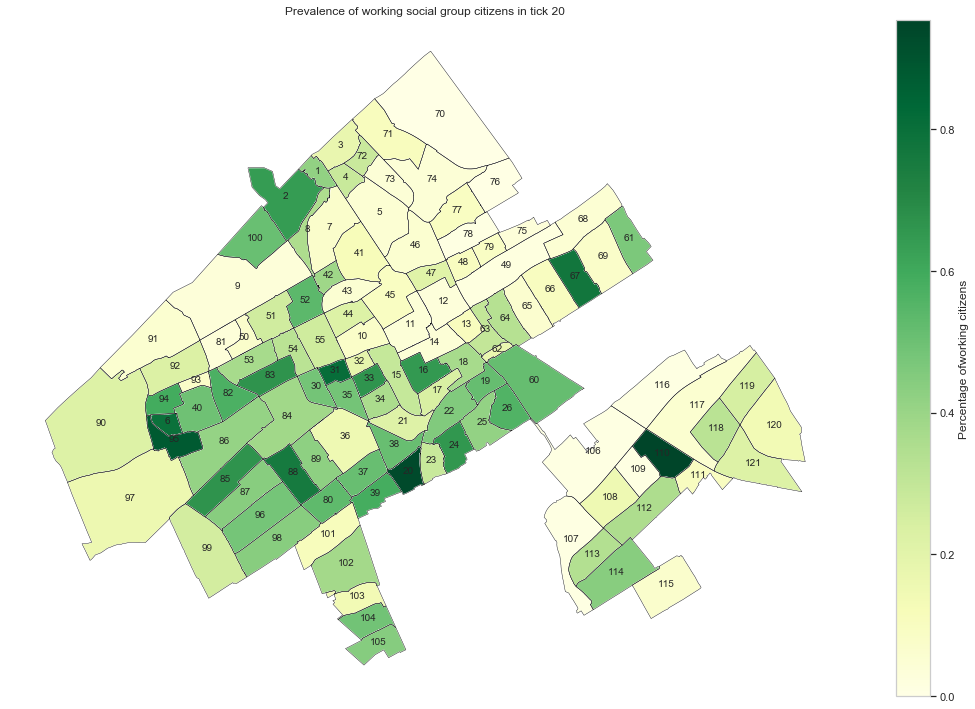

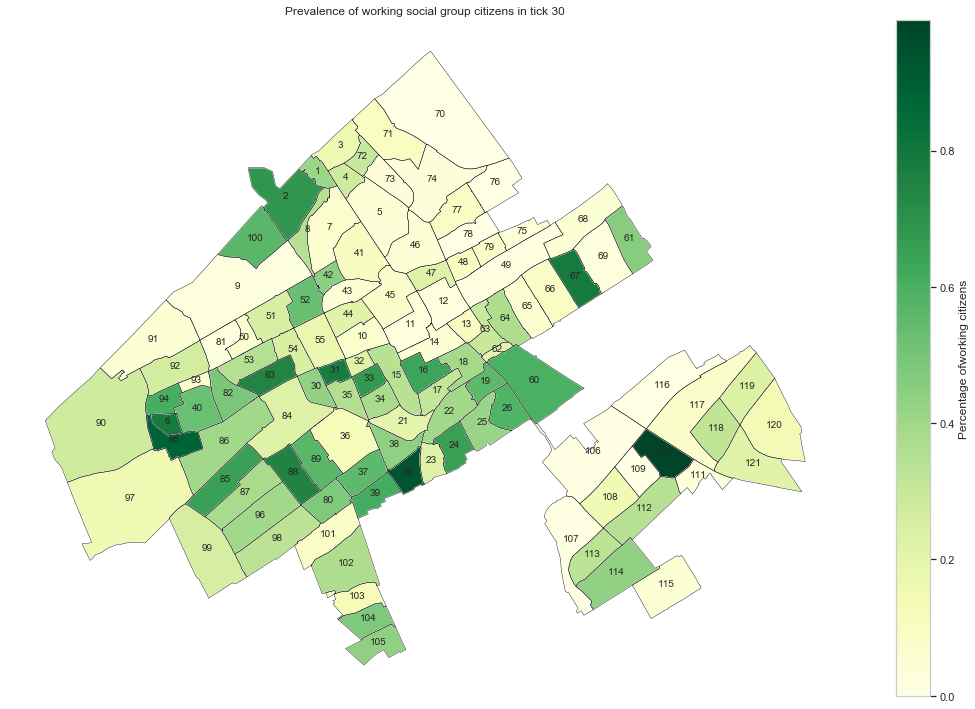

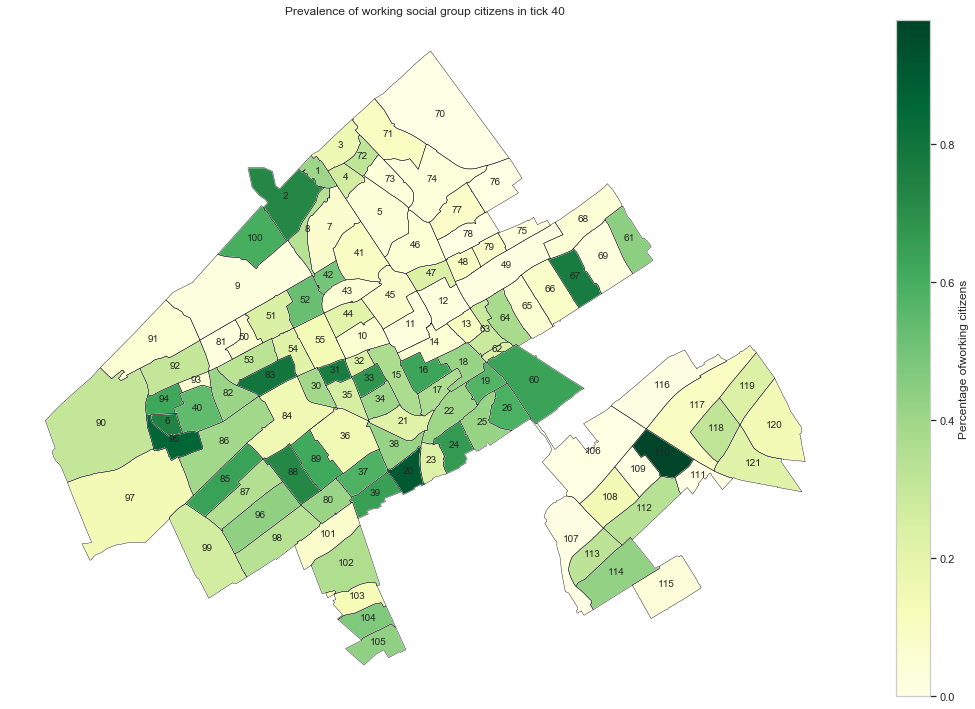

In [130]:
for tick in [1,10,20,30,40]:
    plt.Figure()
    b_tick = df[df["[step]"]==tick].groupby("Neighborhood number").mean()
    b_tick = buurten.merge(b_tick,left_on="BUURTCODE",right_on="Neighborhood number")
    fig = plt.figure(1, figsize=(15,10)) 
    ax = fig.add_subplot()
    string = "working"
    b_tick.apply(lambda x: ax.annotate(s=x.BUURTCODE, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);

    b_tick.boundary.plot(ax=ax, color='Black', linewidth=.4)

    b_tick.plot(ax=ax, cmap='YlGn', column='KPI-p-sc-working', figsize=(12, 12),legend=True,
                 legend_kwds={'label': "Percentage of" + string + " citizens"}).axis('off')
    plt.title("Prevalence of " + string + " social group citizens in tick " + str(tick))
    fig.tight_layout()
    plt.savefig("output/images/map_"+string+"_"+str(tick)+".png")
    plt.show()

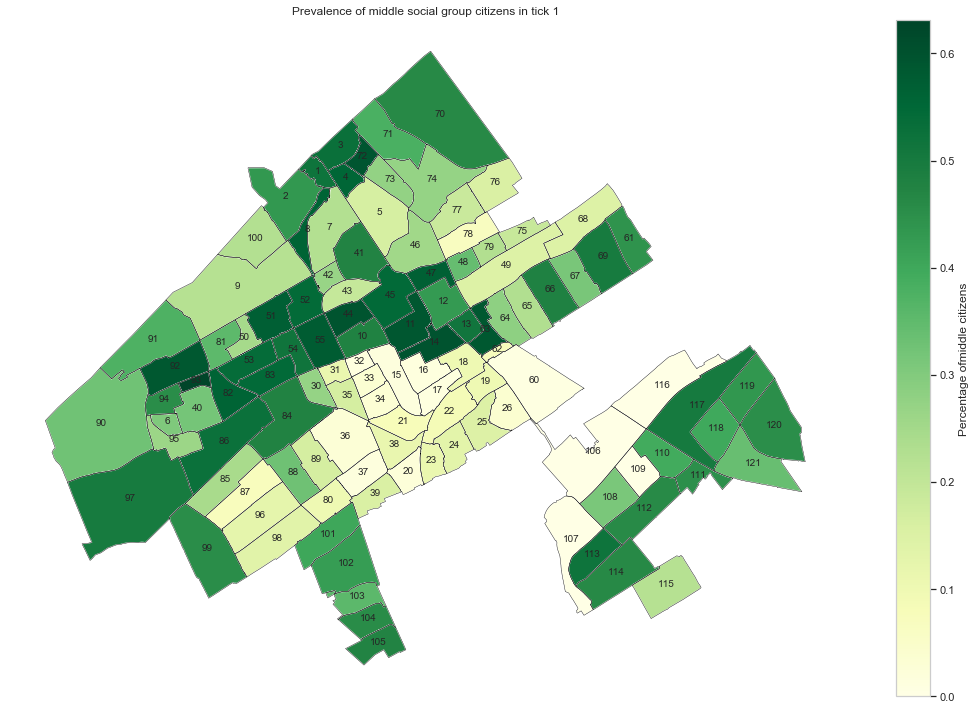

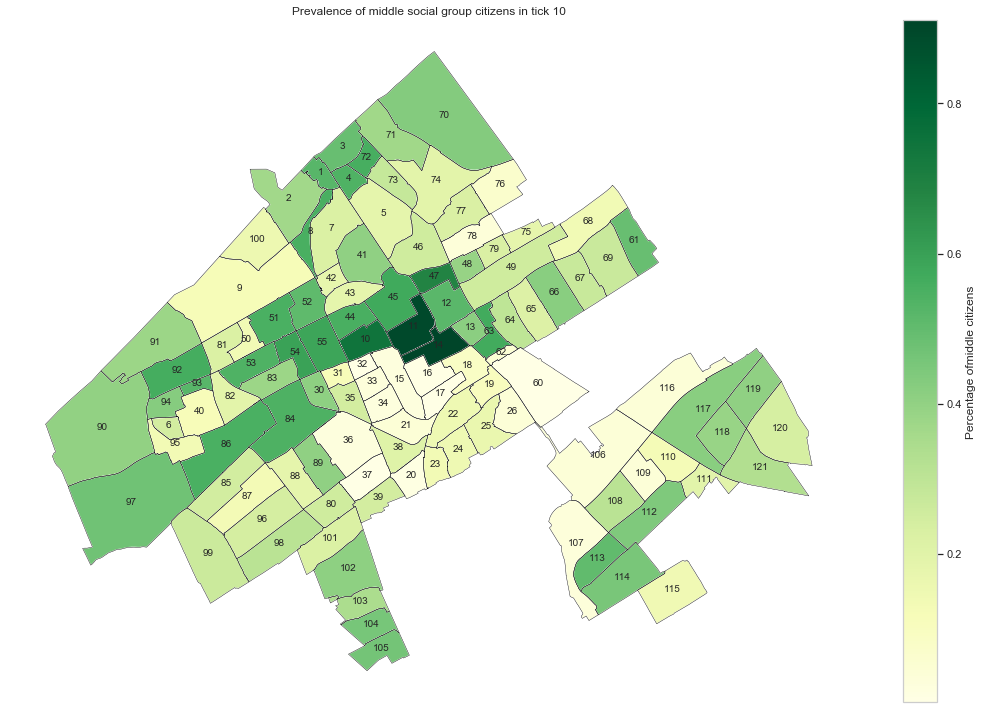

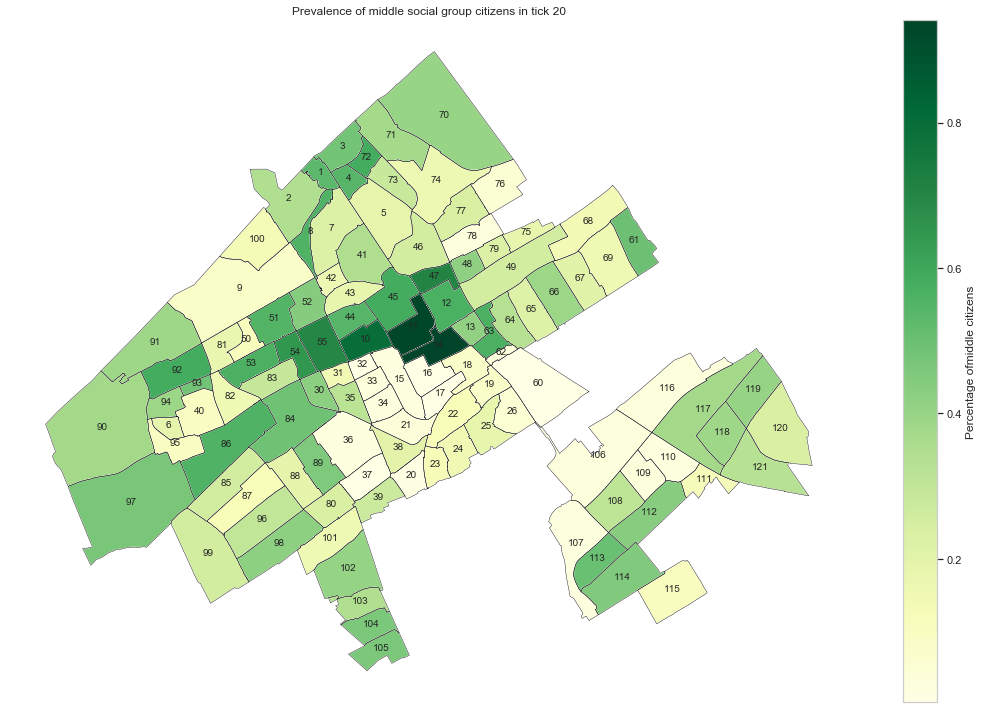

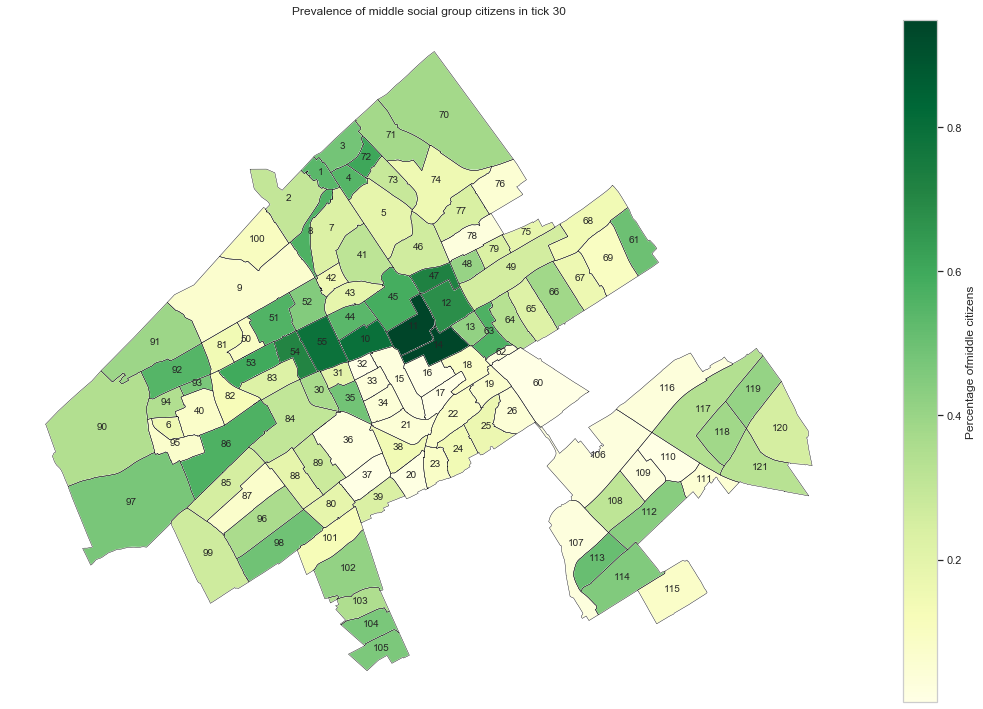

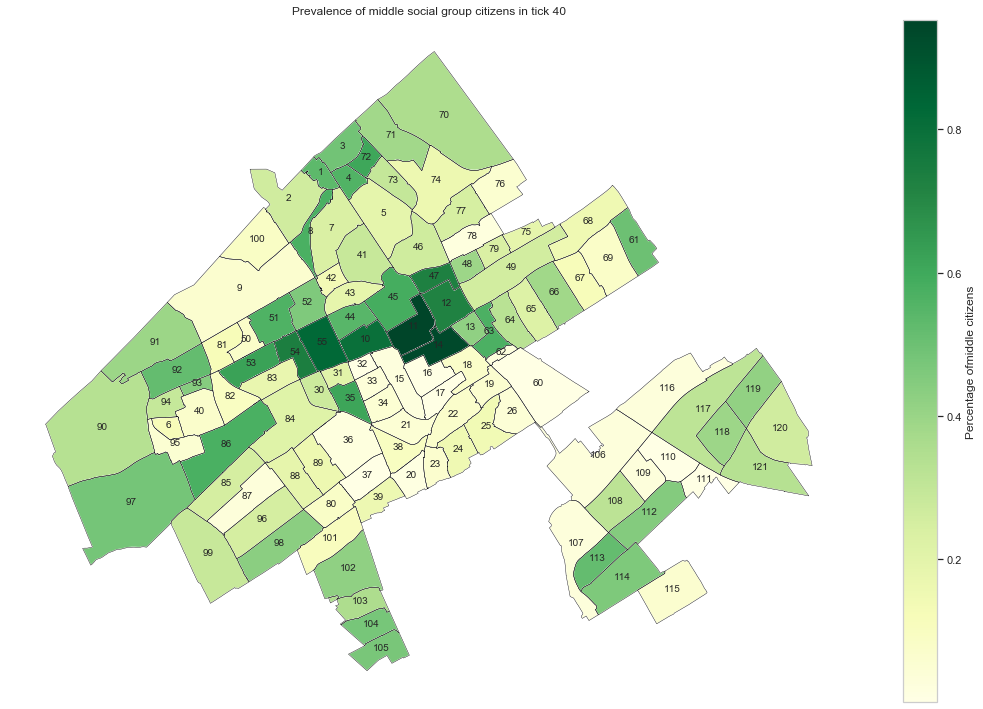

In [131]:
for tick in [1,10,20,30,40]:
    plt.Figure()
    b_tick = df[df["[step]"]==tick].groupby("Neighborhood number").mean()
    b_tick = buurten.merge(b_tick,left_on="BUURTCODE",right_on="Neighborhood number")
    fig = plt.figure(1, figsize=(15,10)) 
    ax = fig.add_subplot()
    string = "middle"
    b_tick.apply(lambda x: ax.annotate(s=x.BUURTCODE, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);

    b_tick.boundary.plot(ax=ax, color='Black', linewidth=.4)

    b_tick.plot(ax=ax, cmap='YlGn', column='KPI-p-sc-middle', figsize=(12, 12),legend=True,
                 legend_kwds={'label': "Percentage of" + string + " citizens"}).axis('off')
    plt.title("Prevalence of " + string + " social group citizens in tick " + str(tick))
    fig.tight_layout()
    plt.savefig("output/images/map_"+string+"_"+str(tick)+".png")
    plt.show()

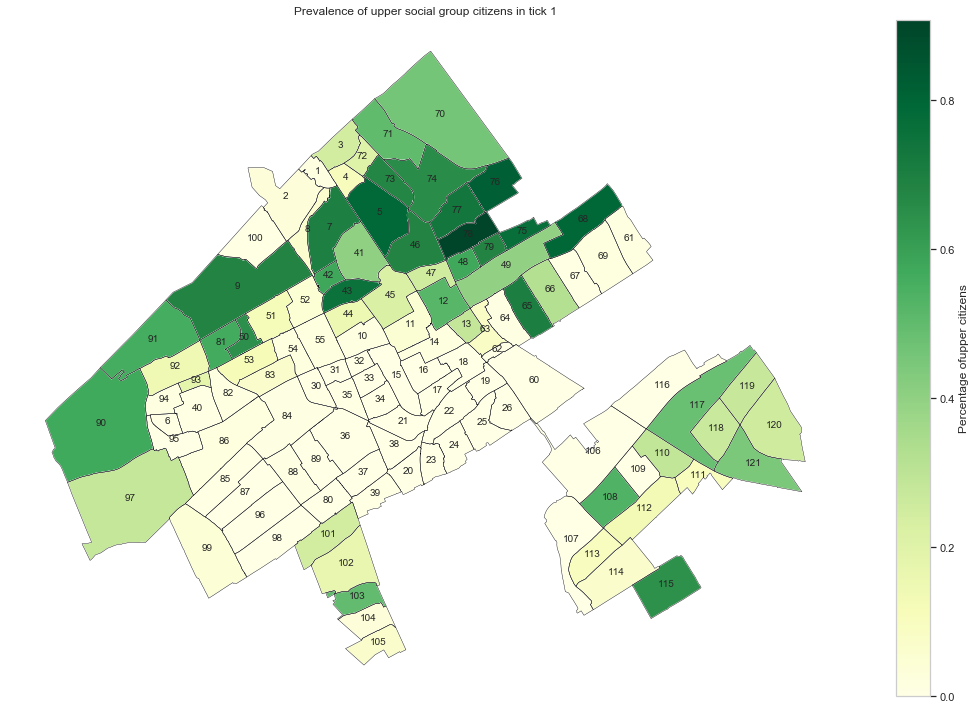

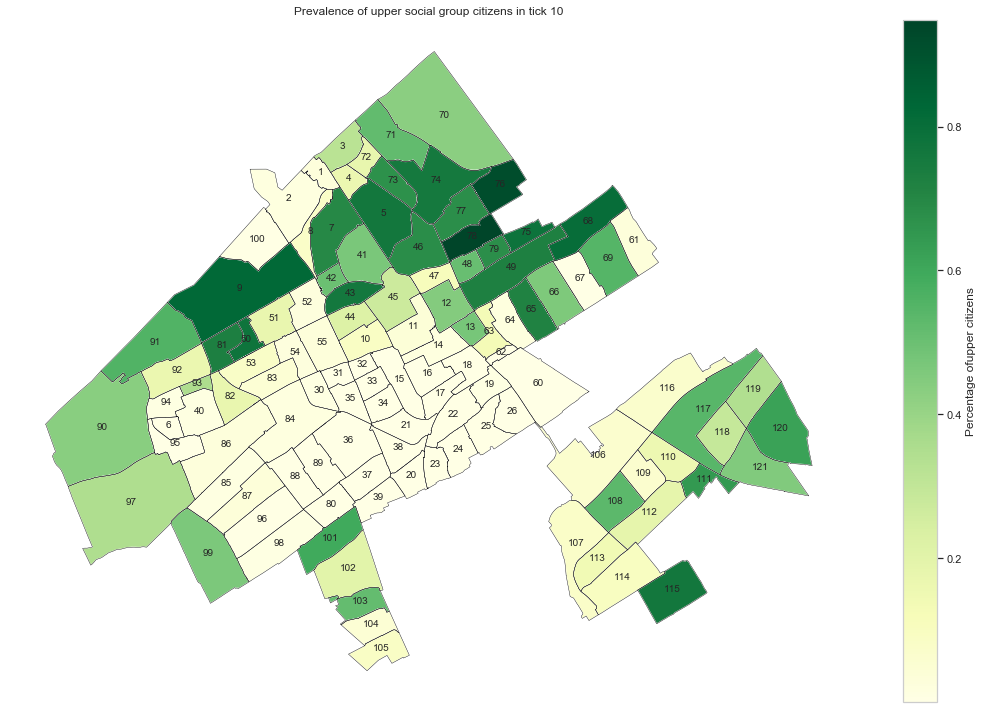

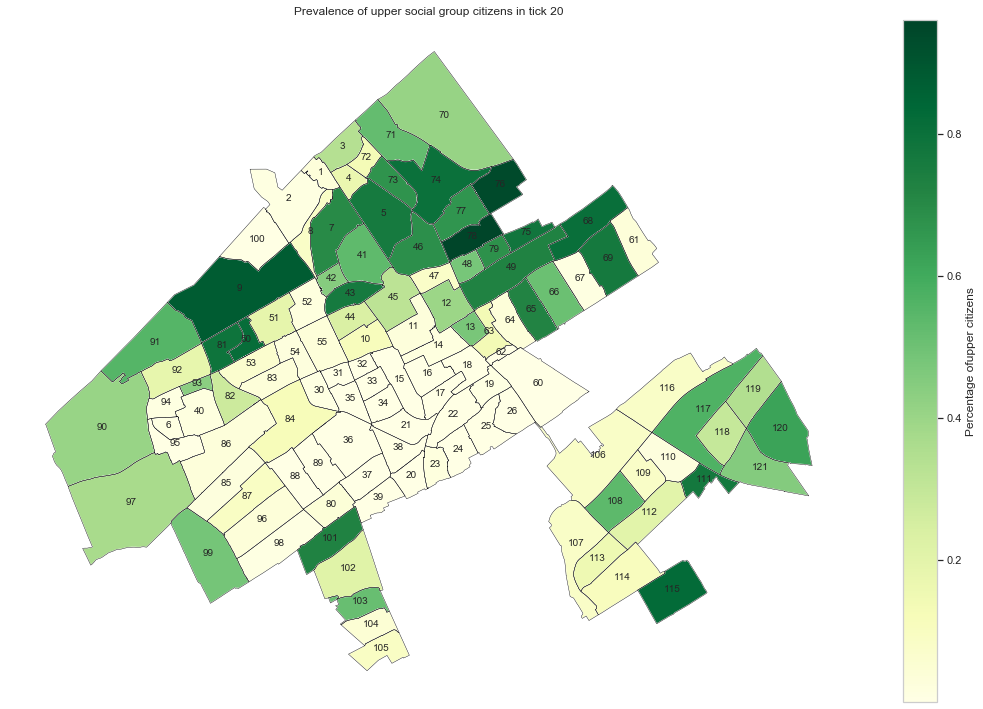

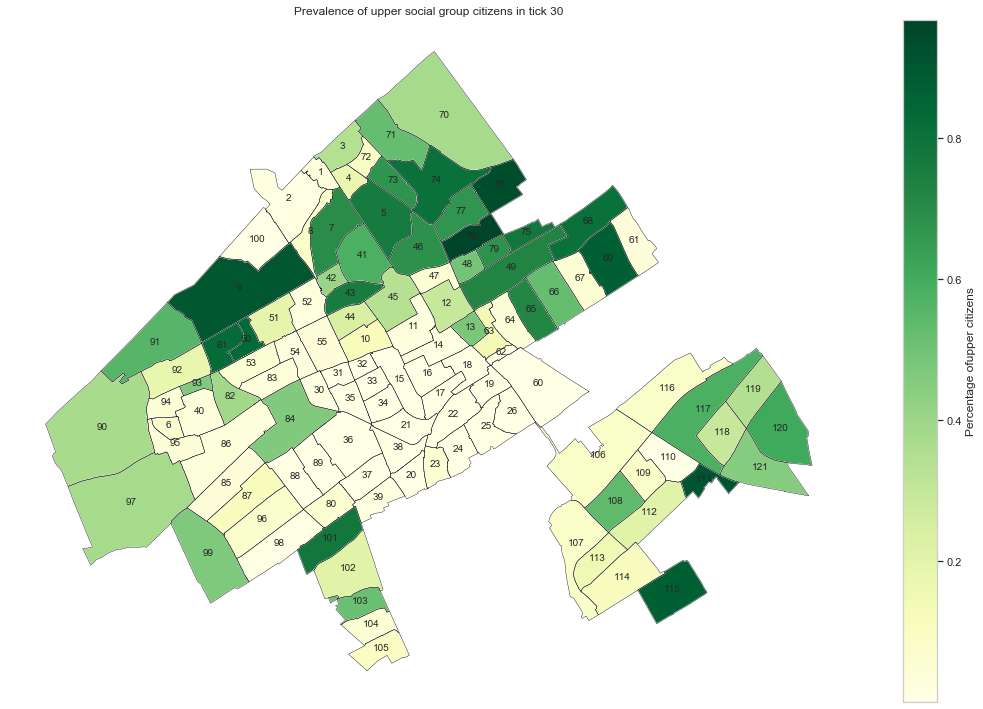

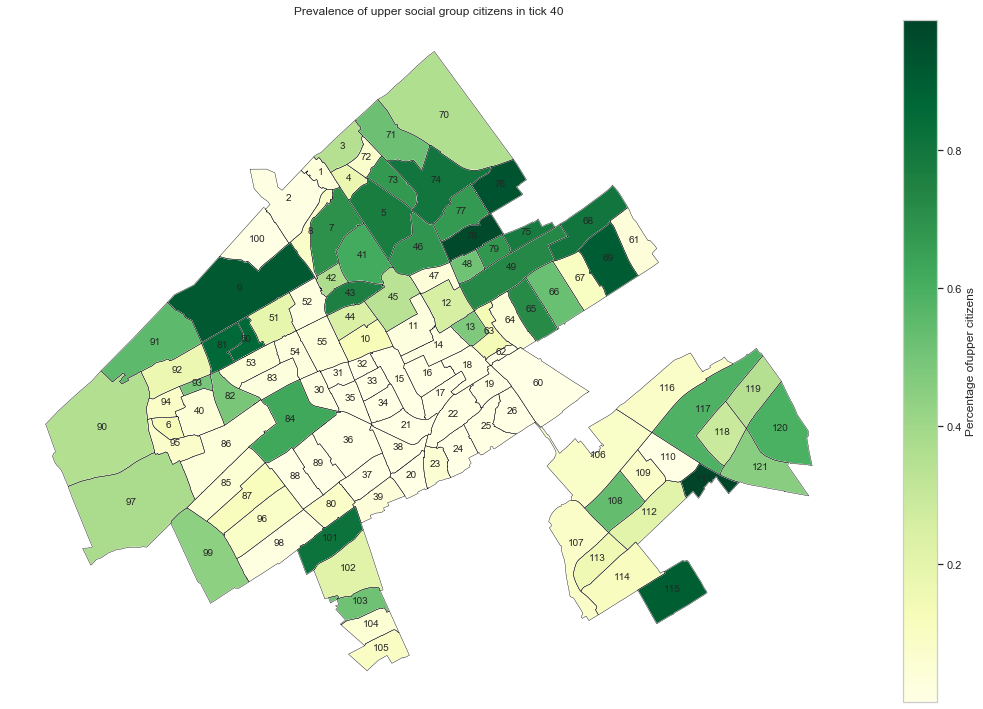

In [132]:
for tick in [1,10,20,30,40]:
    plt.Figure()
    b_tick = df[df["[step]"]==tick].groupby("Neighborhood number").mean()
    b_tick = buurten.merge(b_tick,left_on="BUURTCODE",right_on="Neighborhood number")
    fig = plt.figure(1, figsize=(15,10)) 
    ax = fig.add_subplot()
    string = "upper"
    b_tick.apply(lambda x: ax.annotate(s=x.BUURTCODE, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);

    b_tick.boundary.plot(ax=ax, color='Black', linewidth=.4)

    b_tick.plot(ax=ax, cmap='YlGn', column='KPI-p-sc-upper', figsize=(12, 12),legend=True,
                 legend_kwds={'label': "Percentage of" + string + " citizens"}).axis('off')
    plt.title("Prevalence of " + string + " social group citizens in tick " + str(tick))
    fig.tight_layout()
    plt.savefig("output/images/map_"+string+"_"+str(tick)+".png")
    plt.show()

In [142]:
#difference between start and end for citizen composition for all neighborhoods, used to map change
cit_comp_change_df = df[df["[step]"]==40][['Neighborhood number','KPI-p-sc-lower', 'KPI-p-sc-working',
       'KPI-p-sc-middle', 'KPI-p-sc-upper']].groupby("Neighborhood number").mean()-df[df["[step]"]==1][['Neighborhood number','KPI-p-sc-lower', 'KPI-p-sc-working',
       'KPI-p-sc-middle', 'KPI-p-sc-upper']].groupby("Neighborhood number").mean()

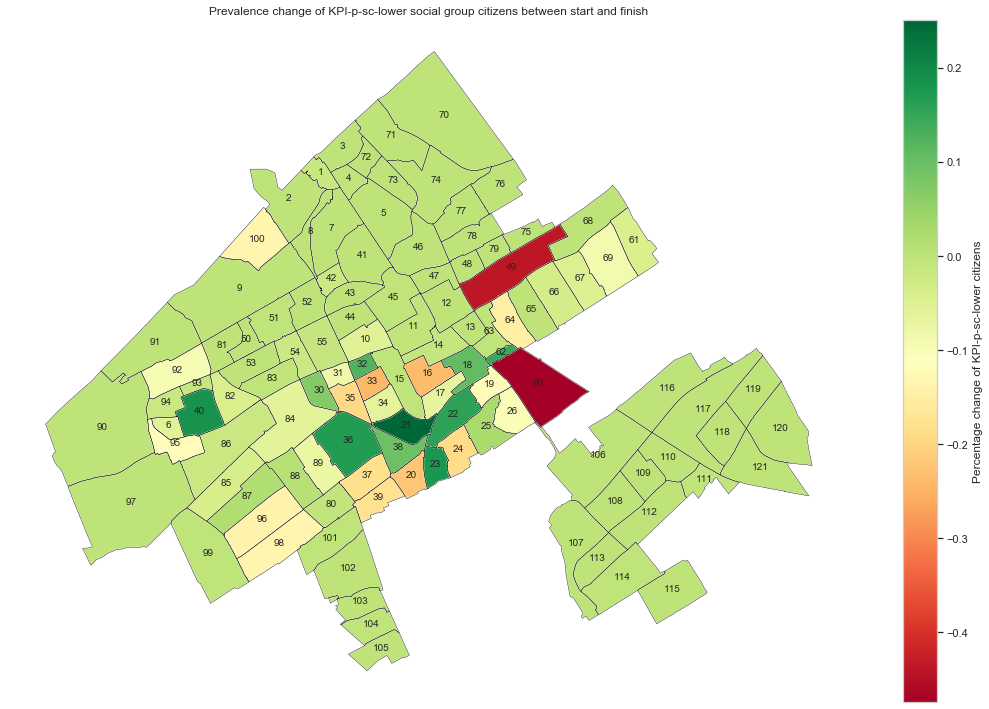

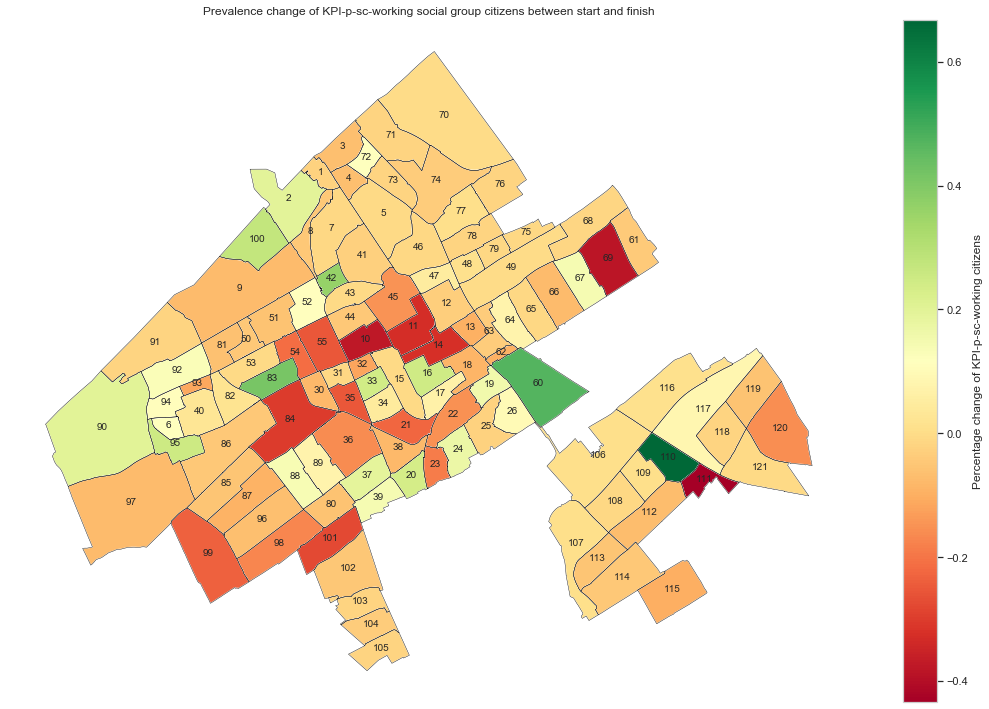

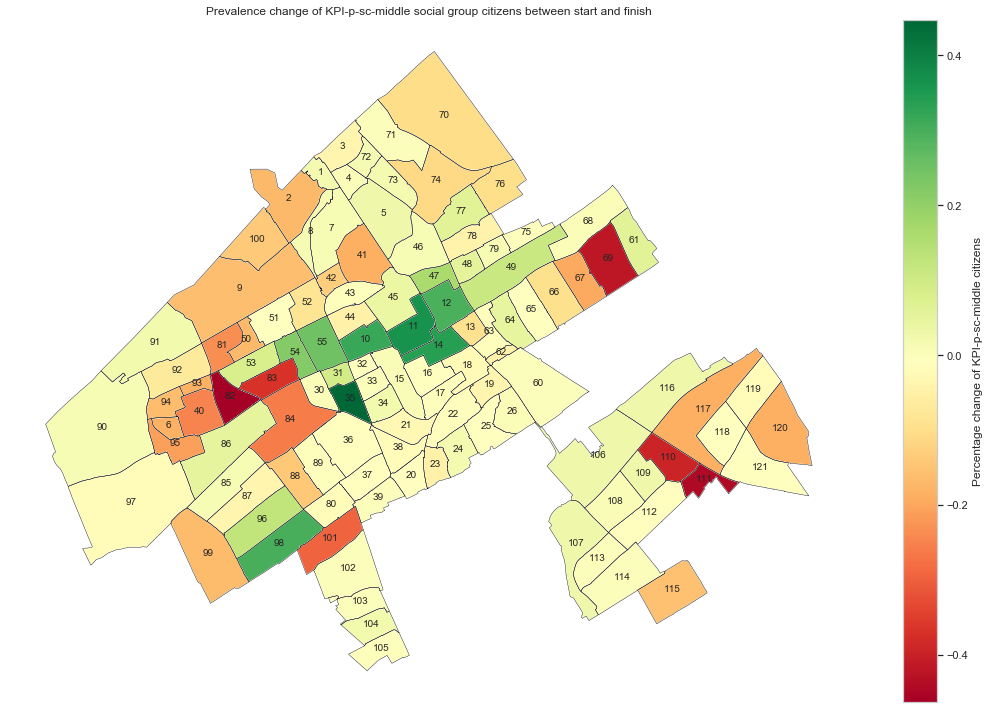

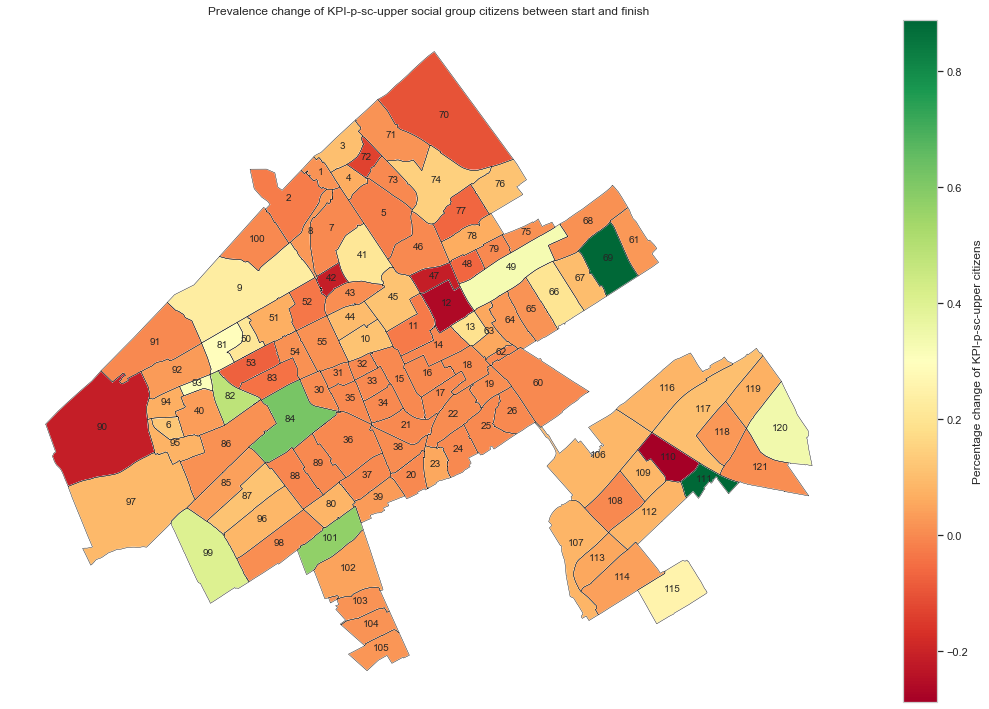

In [153]:
for kpi in ['KPI-p-sc-lower', 'KPI-p-sc-working',
       'KPI-p-sc-middle', 'KPI-p-sc-upper']:
    plt.Figure()
    b_tick = cit_comp_change_df.reset_index()
    b_tick = buurten.merge(b_tick,left_on="BUURTCODE",right_on="Neighborhood number")
    fig = plt.figure(1, figsize=(15,10)) 
    ax = fig.add_subplot()
    string = kpi
    b_tick.apply(lambda x: ax.annotate(s=x.BUURTCODE, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);

    b_tick.boundary.plot(ax=ax, color='Black', linewidth=.4)

    b_tick.plot(ax=ax, cmap='RdYlGn', column=kpi, figsize=(12, 12),legend=True,
                 legend_kwds={'label': "Percentage change of " + string + " citizens"}).axis('off')
    plt.title("Prevalence change of " + string + " social group citizens between start and finish")
    fig.tight_layout()
    plt.savefig("output/images/map_change_"+string+".png")
    plt.show()